In [23]:
import ANN
import numpy as np
import copy
from collections import defaultdict as ddict

In [24]:
numNeurons = 100

In [25]:
class hopfieldNetwork:
    ''' This creates a Hopfield network class '''
    def __init__(self, Input):
        self.Input = Input
        self.numNeurons = self.Input.shape[1]
        self.neuronList = [hopfieldNeuron(1,i) for i in range(self.numNeurons)]
        self.mapInputToNeurons(self.Input)
        self.connections = ddict(list)
        self.connect_neurons()
        self.Output = copy.deepcopy(Input)
        self.compute()
    
    def mapInputToNeurons(self, Input):
        ''' Mapping of the inputs to different subsets of neurons'''
        for index, neuron in enumerate(self.neuronList):
            neuron.input = Input[:,index]
        
    def connect_neurons(self):
        for i, neuron in enumerate(self.neuronList):
            for j, neuron_2 in enumerate(self.neuronList, i+1):
                self.connections[neuron].append((neuron_2, int(neuron.input*neuron_2.input)))
                self.connections[neuron_2].append((neuron, int(neuron.input*neuron_2.input)))
    
    def compute(self, mode ='sync'):
        if mode == 'sync':
            for neuron in self.connections:
                for neuron_in, weight in self.connections[neuron]:
                    neuron.localField += weight*neuron_in.input
                neuron.output = neuron.activation(neuron.localField)
                
class hopfieldNeuron(ANN.neuron):
    def __init__(self, layer, index, activation_method='step'):
        self.input = []
        self.localField = 0
        self.activation_method= activation_method


In [26]:
a = np.array([[-1,1,1]])

In [27]:
hop = hopfieldNetwork(a)

In [28]:
print [i.output for i in hop.neuronList]

[-1, 1, 1]


In [29]:
hop.compute()

In [30]:
print [i.output for i in hop.neuronList]

[-1, 1, 1]


In [31]:
b= np.array([[-1,-1,1]])

In [32]:
hop.mapInputToNeurons(b)

In [51]:
hop.compute()

In [11]:
print [i.output for i in hop.neuronList]

[-1, -1, -1, -1, -1]


## Let's memorize some digits!

In [53]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [101]:
#Load the digits dataset
digits = datasets.load_digits()

In [104]:
# Binarize the dataset
for digit_im, digit_data in zip(digits['images'], digits['data']):
    digit_im[digit_im>0] = 1
    digit_data[digit_data>0] = 1
    digit_data[digit_data==0] = -1

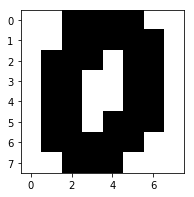

In [105]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [106]:
hop = hopfieldNetwork(np.matrix(digits.data[0]))

In [107]:
print digits.data[0]

[-1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.
  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.
 -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.]


In [108]:
print [i.output for i in hop.neuronList]

[-1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1]


In [116]:
output = np.array([i.output for i in hop.neuronList])
image_out = output.reshape((8,8))

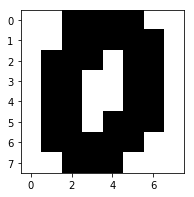

In [118]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(image_out, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [121]:
output[3:6] = -1
image_out = output.reshape((8,8))

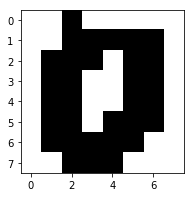

In [122]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(image_out, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [126]:
hop.mapInputToNeurons(np.matrix(output))

In [127]:
hop.compute()

In [131]:
output = np.array([i.output for i in hop.neuronList])
image_out = output.reshape((8,8))

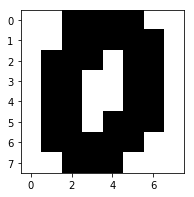

In [132]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(image_out, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()